In [1]:
from pprint import pprint

In [2]:
# Get the Latin Library corpus

# ^^^ Add step for installing Latin Library as a corpus

from cltk.corpus.latin import latinlibrary
files = latinlibrary.fileids()

print(files[:15])

['12tables.txt', '1644.txt', 'abbofloracensis.txt', 'abelard/dialogus.txt', 'abelard/epistola.txt', 'abelard/historia.txt', 'addison/barometri.txt', 'addison/burnett.txt', 'addison/hannes.txt', 'addison/machinae.txt', 'addison/pax.txt', 'addison/praelium.txt', 'addison/preface.txt', 'addison/resurr.txt', 'addison/sphaer.txt']


In [3]:
print([file for file in files if 'prop' in file])

['alcuin/propos.txt', 'prop2.txt', 'prop3.txt', 'prop4.txt', 'propertius1.txt', 'tertullian/tertullian.propheta.txt']


In [4]:
print([file for file in files if 'tib' in file])

['erasmus/antibarb.txt', 'suetonius/suet.tib.txt', 'suetonius/suet.tibullus.txt', 'tibullus1.txt', 'tibullus2.txt', 'tibullus3.txt']


In [5]:
# Get the Propertius texts

propertius_file = 'propertius1.txt'
propertius_raw = latinlibrary.raw(propertius_file)

print(propertius_raw[:500])

SEXTI PROPERTI ELEGIARVM LIBER PRIMVS

1 2 3 4 5 6 7 8a 8b 9 10 11 12 13 14 15 16 17 18 19 20 21 22

I

Cynthia prima suis miserum me cepit ocellis,
    contactum nullis ante cupidinibus.
tum mihi constantis deiecit lumina fastus
    et caput impositis pressit Amor pedibus,
donec me docuit castas odisse puellas                 5
    improbus, et nullo vivere consilio.
ei mihi, iam toto furor hic non deficit anno,
    cum tamen adversos cogor habere deos.
Milanion nullos fugiendo, Tulle, labores



In [6]:
# Get the Tibullus texts

tibullus_file = 'tibullus1.txt'
tibullus_raw = latinlibrary.raw(tibullus_file)

print(tibullus_raw[:500])

Tibullus Book I
		 

		 
		 
	 
	
 

 A. TIBVLLI ELEGIAE LIBER PRIMVS 

 

 
 I II III IV V VI VII VIII IX X 

 

 
 I 

 
 Divitias alius fulvo sibi congerat auro 
 &nbsp Et teneat culti iugera multa soli, 
Quem labor adsiduus vicino terreat hoste, 
 &nbsp Martia cui somnos classica pulsa fugent: 
Me mea paupertas vita traducat inerti,    5 
 &nbsp Dum meus adsiduo luceat igne focus. 
Ipse seram teneras maturo tempore vites 
 &nbsp Rusticus et facili grandia poma manu; 
Nec spes destituat, sed 


In [7]:
print(tibullus_raw[-500:])

ellam 
 &nbsp Verberat: e caelo deripit ille deos.    60 
Sit satis e membris tenuem rescindere vestem, 
 &nbsp Sit satis ornatus dissoluisse comae, 
Sit lacrimas movisse satis: quater ille beatus, 
 &nbsp Quo tenera irato flere puella potest. 
Sed manibus qui saevus erit, scutumque sudemque    65 
 &nbsp Is gerat et miti sit procul a Venere. 
At nobis, Pax alma, veni spicamque teneto, 
 &nbsp Perfluat et pomis candidus ante sinus.
 

 

 
 
 
	 Tibullus 
	 The Latin Library 
	 The Classics Page


In [8]:
import re
import html

from cltk.stem.latin.j_v import JVReplacer
replacer = JVReplacer()

In [9]:
# Preprocess texts

def preprocess(text):

    remove_list = [r'\bThe Latin Library\b',
                   r'\bThe Classics Page\b',
                   r'\bPropertius\b',
                   r'\bSEXTI PROPERTI ELEGIARVM LIBER PRIMVS\b',
                   r'8a', r'8b', r'VIIIA', r'VIIIB',
                   r'\bTibullus Book I\b',
                   r'\bTibullus',
                   r'\bA. TIBVLLI ELEGIAE LIBER PRIMVS\b',
                   r'I II III IV V VI VII VIII IX X',
                   r'25a', r'25b'
                  ]
    
    for pattern in remove_list:
        text = re.sub(pattern, '', text)
    
    # REMOVE LETTER HEADINGS?
    
    text = html.unescape(text) # Handle html entities
    text = re.sub(r'&nbsp;?', ' ',text) #&nbsp; stripped incorrectly in corpus?
    text = re.sub(r'\x00',' ',text) #Another space problem?
    text = re.sub(r' \xa0 ', '    ', text)
    
    # Remove roman numeral headings; must be before lower & replacer
    text = re.sub(r'\b(M{1,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})|M{0,4}(CM|C?D|D?C{1,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,4})|M{0,4}(CM|CD|D?C{0,3})(XC|X?L|L?X{1,3})(IX|IV|V?I{0,3})|M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|I?V|V?I{1,3}))\b',' ',text)
    
    text = text.lower()
    text = replacer.replace(text) #Normalize u/v & i/j
    
    punctuation ="\"#$%&\'()+,-/:;<=>@[\]^_`{|}~.?!«»—"
    translator = str.maketrans({key: " " for key in punctuation})
    text = text.translate(translator)
    
    translator = str.maketrans({key: " " for key in '0123456789'})
    text = text.translate(translator)
    
    # Handle spacing
    text = re.sub('[ ]+',' ', text) # Remove double spaces
    text = re.sub('\t',' ', text) # Remove tabs
    text = re.sub('^\s+','', text)
    text = re.sub(' \n', '\n', text)
    text = re.sub('\n\n', '~', text)
    text = re.sub('~+', '\n\n', text)
    #text = re.sub('\s+\n+\s','\n', text) # Remove double lines and trim spaces around new lines
    
    return text.strip()

In [10]:
tibullus_edit = preprocess(tibullus_raw)


In [11]:
tibullus = tibullus_edit.split('\n\n')

In [12]:
print(len(tibullus))

10


In [13]:
propertius_edit = preprocess(propertius_raw)

print(propertius_edit)

cynthia prima suis miserum me cepit ocellis
 contactum nullis ante cupidinibus
tum mihi constantis deiecit lumina fastus
 et caput impositis pressit amor pedibus
donec me docuit castas odisse puellas
 improbus et nullo uiuere consilio
ei mihi iam toto furor hic non deficit anno
 cum tamen aduersos cogor habere deos
milanion nullos fugiendo tulle labores
 saeuitiam durae contudit iasidos
nam modo partheniis amens errabat in antris
 rursus in hirsutas ibat et ille feras
ille etiam hylaei percussus uulnere rami
 saucius arcadiis rupibus ingemuit
ergo uelocem potuit domuisse puellam
 tantum in amore fides et benefacta ualent
in me tardus amor non ullas cogitat artes
 nec meminit notas ut prius ire uias
at uos deductae quibus est pellacia lunae
 et labor in magicis sacra piare focis
en agedum dominae mentem conuertite nostrae
 et facite illa meo palleat ore magis
tunc ego crediderim manes et sidera uobis
 posse cytinaeis ducere carminibus
aut uos qui sero lapsum reuocatis amici
 quaerite no

In [14]:
propertius = propertius_edit.split('\n\n')

In [15]:
for poem in propertius:
    print(poem[:poem.find('\n')])

cynthia prima suis miserum me cepit ocellis
quid iuuat ornato procedere uita capillo
qualis thesea iacuit cedente carina
quid mihi tam multas laudando basse puellas
quid tibi uis insane meae sentire furores
non ego nunc hadriae uereor mare noscere tecum
dum tibi cadmeae dicuntur pontice thebae
tune igitur demens nec te mea cura moratur
hic erit hic iurata manet rumpantur iniqui
dicebam tibi uenturos irrisor amores
o iucunda quies primo cum testis amori
ecquid te mediis cessantem cynthia baiis
quid mihi desidiae non cessas fingere crimen
tu quod saepe soles nostro laetabere casu
tu licet abiectus tiberina molliter unda
saepe ego multa tuae leuitatis dura timebam
quae fueram magnis olim patefacta triumphis
et merito quoniam potui fugisse puellam
haec certe deserta loca et taciturna querenti
non ego nunc tristis uereor mea cynthia manes
hoc pro continuo te galle monemus amore
tu qui consortem properas euadere casum
qualis et unde genus qui sint mihi tulle penates


In [16]:
tibullus_titles = ['Tib. 1.1', 'Tib. 1.2', 'Tib. 1.3', 'Tib. 1.4', 'Tib. 1.5', 
                   'Tib. 1.6', 'Tib. 1.7', 'Tib. 1.8', 'Tib. 1.9', 'Tib. 1.10']

propertius_titles = ['Prop. 1.1', 'Prop. 1.2', 'Prop. 1.3', 'Prop. 1.4', 'Prop. 1.5', 
                     'Prop. 1.6', 'Prop. 1.7', 'Prop. 1.8a', 'Prop. 1.8b', 'Prop. 1.9', 
                     'Prop. 1.10', 'Prop. 1.11', 'Prop. 1.12', 'Prop. 1.13', 'Prop. 1.14', 
                     'Prop. 1.15', 'Prop. 1.16', 'Prop. 1.17', 'Prop. 1.18', 'Prop. 1.19', 
                     'Prop. 1.20', 'Prop. 1.21', 'Prop. 1.22']


In [17]:
print(propertius[0])

cynthia prima suis miserum me cepit ocellis
 contactum nullis ante cupidinibus
tum mihi constantis deiecit lumina fastus
 et caput impositis pressit amor pedibus
donec me docuit castas odisse puellas
 improbus et nullo uiuere consilio
ei mihi iam toto furor hic non deficit anno
 cum tamen aduersos cogor habere deos
milanion nullos fugiendo tulle labores
 saeuitiam durae contudit iasidos
nam modo partheniis amens errabat in antris
 rursus in hirsutas ibat et ille feras
ille etiam hylaei percussus uulnere rami
 saucius arcadiis rupibus ingemuit
ergo uelocem potuit domuisse puellam
 tantum in amore fides et benefacta ualent
in me tardus amor non ullas cogitat artes
 nec meminit notas ut prius ire uias
at uos deductae quibus est pellacia lunae
 et labor in magicis sacra piare focis
en agedum dominae mentem conuertite nostrae
 et facite illa meo palleat ore magis
tunc ego crediderim manes et sidera uobis
 posse cytinaeis ducere carminibus
aut uos qui sero lapsum reuocatis amici
 quaerite no

In [18]:
from cltk.tokenize.word import WordTokenizer
word_tokenizer = WordTokenizer('latin')

In [19]:
tokens = word_tokenizer.tokenize(propertius[0])
print(tokens)

['cynthia', 'prima', 'suis', 'miserum', 'me', 'cepit', 'ocellis', 'contactum', 'nullis', 'ante', 'cupidinibus', 'tum', 'mihi', 'constantis', 'deiecit', 'lumina', 'fastus', 'et', 'caput', 'impositis', 'pressit', 'amor', 'pedibus', 'donec', 'me', 'docuit', 'castas', 'odisse', 'puellas', 'improbus', 'et', 'nullo', 'uiuere', 'consilio', 'ei', 'mihi', 'iam', 'toto', 'furor', 'hic', 'non', 'deficit', 'anno', 'cum', 'tamen', 'aduersos', 'cogor', 'habere', 'deos', 'milanio', '-ne', 'nullos', 'fugiendo', 'tulle', 'labores', 'saeuitiam', 'durae', 'contudit', 'iasidos', 'nam', 'modo', 'partheniis', 'amens', 'errabat', 'in', 'antris', 'rursus', 'in', 'hirsutas', 'ibat', 'et', 'ille', 'feras', 'ille', 'etiam', 'hylaei', 'percussus', 'uulnere', 'rami', 'saucius', 'arcadiis', 'rupibus', 'ingemuit', 'ergo', 'uelocem', 'potuit', 'domuisse', 'puellam', 'tantum', 'in', 'amore', 'fides', 'et', 'benefacta', 'ualent', 'in', 'me', 'tardus', 'amor', 'non', 'ullas', 'cogitat', 'artes', 'nec', 'meminit', 'notas

In [20]:
propertius_tokens = [word_tokenizer.tokenize(poem) for poem in propertius]
tibullus_tokens = [word_tokenizer.tokenize(poem) for poem in tibullus]

In [21]:
import os
from cltk.utils.file_operations import open_pickle

# Set up training sentences

rel_path = os.path.join('~/cltk_data/latin/model/latin_models_cltk/lemmata/backoff')
path = os.path.expanduser(rel_path)

# Check for presence of latin_pos_lemmatized_sents
file = 'latin_pos_lemmatized_sents.pickle'      

latin_pos_lemmatized_sents_path = os.path.join(path, file)
if os.path.isfile(latin_pos_lemmatized_sents_path):
    latin_pos_lemmatized_sents = open_pickle(latin_pos_lemmatized_sents_path)
else:
    latin_pos_lemmatized_sents = []
    print('The file %s is not available in cltk_data' % file)  

In [22]:
from cltk.lemmatize.latin.backoff import BackoffLatinLemmatizer
lemmatizer = BackoffLatinLemmatizer(latin_pos_lemmatized_sents)

In [23]:
#lemmas = lemmatizer.lemmatize(propertius_tokens[0])

In [24]:
#print(lemmas)

In [400]:
# Make one string of all files, delimited by |||
# (NB: Attempt to reduce the number of regex compiles.)

def create_lemmatized_texts(texts):
    textin = " ||| ".join(texts)
    tokens = textin.split()
    lemmas = lemmatizer.lemmatize(tokens)
    textout = " ".join(lemma[1] for lemma in lemmas)
    translator = str.maketrans({key: " " for key in '0123456789'})
    textout = textout.translate(translator)
    lemmatized_texts = textout.split('|||')
    #lemmatized_texts = textout
    return lemmatized_texts


In [401]:
test = create_lemmatized_texts(propertius[:1])
print(test)

['cynthia primus suus miser ego capio ocellus contingo nullus ante cupido tum ego consto deicio lumen fastus et caput impono premo amor pes donec ego doceo castus odi puella improbus et nullus uiuo consilis is ego iam totus furor hic non deficio annus cum  tamen aduerto cogo habeo deus milanion nullus fugio tullus labor saevitia durus contundo iasidos nam modo parthenius amens erro in antrum rursus in hirsutus eo et ille ferus ille etiam hylaeus percutio uulnus ramus saucius arcadius rupes ingemo ergo uelox possum domo puella tantus in amor fides et benefacio ualeo in ego tardus amor non ullus cogito ars neque memini nosco ut prior eo uia at tu deduco qui sum pellacia luna et labor in magicus sacer piaris focus en agedum domina mens conuerto noster et facio ille meus palleo os magis tunc ego credo manes et sidus tu possum cytinaeis duco carmen aut tu qui serus labor reuoco amicus quaero non sanus pector auxilium fortis et ferrum saeuus patior et ignis sum modo libertas qui uolo ira loq

In [27]:
#propertius_lemmas = [lemmatizer.lemmatize(tokens) for tokens in propertius_tokens]
#tibullus_lemmas = [lemmatizer.lemmatize(tokens) for tokens in tibullus_tokens]

In [28]:
# ^^^ pickle the lemmatized texts to speed up workshop

In [29]:
propertius_tokenized_texts = [' '.join(tokens) for tokens in propertius_tokens]
tibullus_tokenized_texts = [' '.join(tokens) for tokens in tibullus_tokens]

propertius_lemmatized_texts = create_lemmatized_texts(propertius_tokenized_texts)
tibullus_lemmatized_texts = create_lemmatized_texts(tibullus_tokenized_texts)

In [30]:
propertius_lemmas = [text.split() for text in propertius_lemmatized_texts]
propertius_lemmas = [item for sublist in propertius_lemmas for item in sublist]

tibullus_lemmas = [text.split() for text in tibullus_lemmatized_texts]
tibullus_lemmas = [item for sublist in tibullus_lemmas for item in sublist]

In [31]:
from collections import Counter

# Build counter of top token counts
propertius_lemmas_counter = Counter(propertius_lemmas)
propertius_lemmas_mc = propertius_lemmas_counter.most_common(100)

running = 0

print('Top 25 lemmas in Propertius 1:\n')
print("{number:>5}  {lemma:<12}{count:<12}{percent:<12}{running:<12}".format(number="", lemma="lemma", count="COUNT", percent="Type-Tok %", running = "RUNNING %"))
for i, pair in enumerate(propertius_lemmas_mc[:10]):
    running += pair[1]
    print("{number:>5}. {lemma:<12}{count:<12}{percent:<12}{running:<12}".format(number=i+1, lemma=pair[0], count=pair[1], percent=str(round(pair[1] / len(propertius_lemmas)*100, 2))+"%", running = str(round(running / len(propertius_lemmas)*100, 2))+"%"))

Top 25 lemmas in Propertius 1:

       lemma       COUNT       Type-Tok %  RUNNING %   
    1. et          135         3.05%       3.05%       
    2. sum         124         2.81%       5.86%       
    3. tu          113         2.56%       8.42%       
    4. ego         106         2.4%        10.82%      
    5. non         84          1.9%        12.72%      
    6. qui         66          1.49%       14.21%      
    7. amor        61          1.38%       15.59%      
    8. meus        57          1.29%       16.88%      
    9. ille        52          1.18%       18.06%      
   10. neque       49          1.11%       19.17%      


In [32]:
# Build counter of top token counts
tibullus_lemmas_counter = Counter(tibullus_lemmas)
tibullus_lemmas_mc = tibullus_lemmas_counter.most_common(100)

running = 0

print('Top 25 lemmas in tibullus 1:\n')
print("{number:>5}  {lemma:<12}{count:<12}{percent:<12}{running:<12}".format(number="", lemma="lemma", count="COUNT", percent="Type-Tok %", running = "RUNNING %"))
for i, pair in enumerate(tibullus_lemmas_mc[:10]):
    running += pair[1]
    print("{number:>5}. {lemma:<12}{count:<12}{percent:<12}{running:<12}".format(number=i+1, lemma=pair[0], count=pair[1], percent=str(round(pair[1] / len(tibullus_lemmas)*100, 2))+"%", running = str(round(running / len(tibullus_lemmas)*100, 2))+"%"))

Top 25 lemmas in tibullus 1:

       lemma       COUNT       Type-Tok %  RUNNING %   
    1. et          148         2.77%       2.77%       
    2. sum         119         2.23%       5.0%        
    3. ego         108         2.02%       7.02%       
    4. -que        106         1.98%       9.01%       
    5. tu          101         1.89%       10.9%       
    6. non         68          1.27%       12.17%      
    7. hic         61          1.14%       13.31%      
    8. qui         56          1.05%       14.36%      
    9. ille        56          1.05%       15.41%      
   10. neque       48          0.9%        16.31%      


In [33]:
import numpy as np
import sklearn.feature_extraction.text as text

In [34]:
vectorizer = text.CountVectorizer(input='content')

In [35]:
dtm = vectorizer.fit_transform(propertius_lemmatized_texts)
dtm = dtm.toarray()
vocab = np.array(vectorizer.get_feature_names())
print(vocab)

['ab' 'abeo' 'abicio' ..., 'zephyro' 'zephyrus' 'zetes']


In [36]:
lengths = np.sum(dtm, axis=1)
print(lengths)
print(len(lengths))

[242 196 262 194 196 235 163 171 134 226 185 183 132 234 149 251 284 173
 213 166 302  58  60]
23


In [37]:
import matplotlib.pyplot as plt

In [38]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
dist = 1 - cosine_similarity(dtm)

In [40]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=1)

In [41]:
pos = mds.fit_transform(dist)

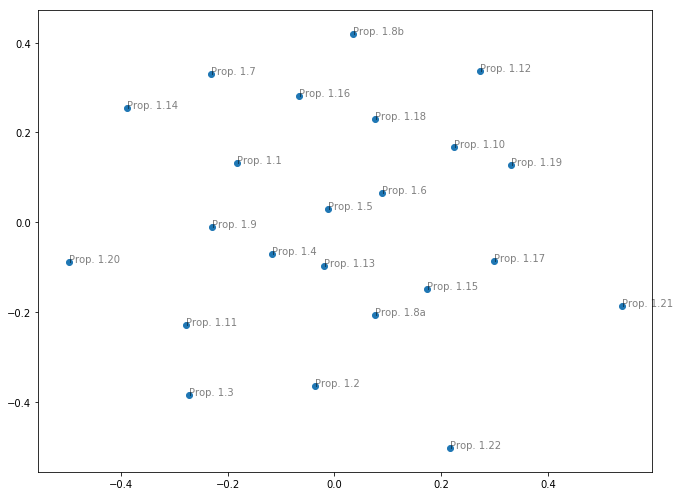

In [42]:
plt.figure(figsize=(11,8.5))

xs, ys = pos[:,0], pos[:,1]
plt.scatter(xs, ys, cmap='spring')
for x, y, name in zip(xs, ys, propertius_titles):
    plt.text(x,y,name,alpha=0.5,fontsize=10)

    
#print(len(xs))
plt.show()

In [43]:
from scipy.cluster.hierarchy import ward, dendrogram

In [44]:
linkage_matrix = ward(dist)

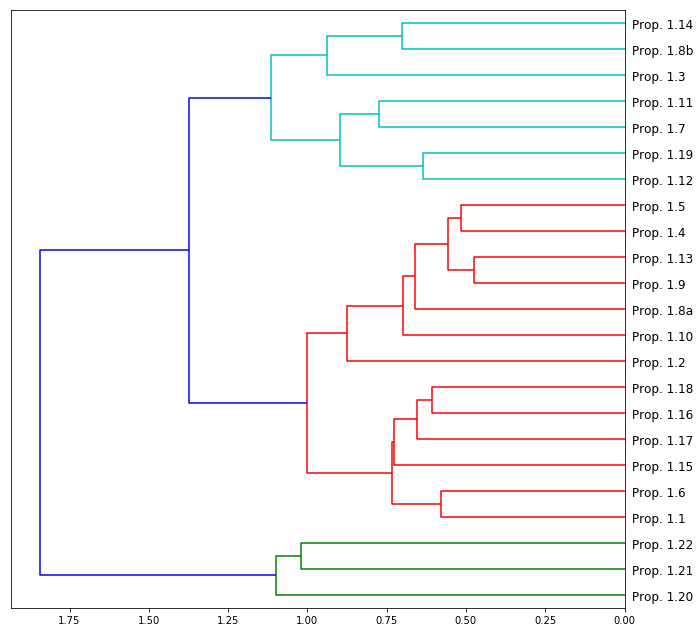

In [47]:
plt.figure(figsize=(11,11))
dendrogram(linkage_matrix, orientation="left", labels=propertius_titles, leaf_font_size=12);
plt.show()

In [48]:
texts = propertius_lemmatized_texts + tibullus_lemmatized_texts
titles = propertius_titles + tibullus_titles



In [49]:
dtm = vectorizer.fit_transform(texts)
dtm = dtm.toarray()

In [50]:
dist = 1 - cosine_similarity(dtm)
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
pos = mds.fit_transform(dist)
plt.figure(figsize=(11,8.5))

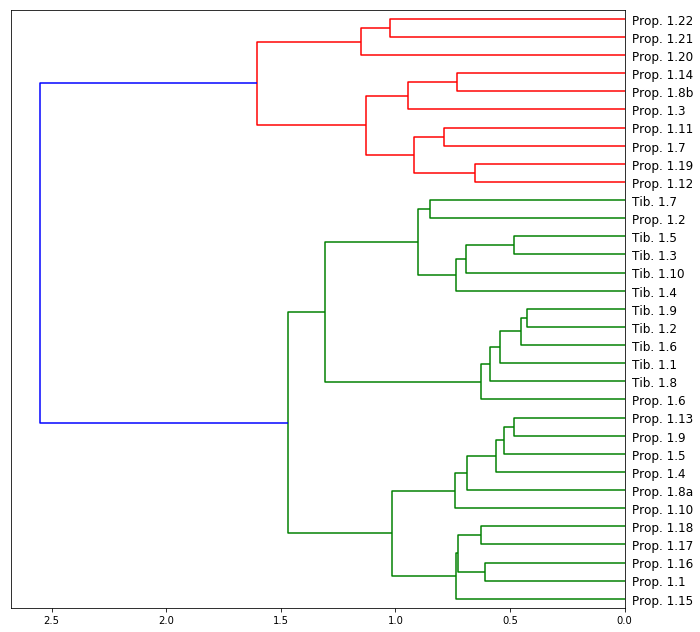

In [52]:
linkage_matrix = ward(dist)
plt.figure(figsize=(11,11))
dendrogram(linkage_matrix, orientation="left", labels=titles, leaf_font_size=12);
plt.show()

"The fact that four words (out of eighty-four) in a Propertian passage, and words that are hardly unusual or remarkable, bear some similarity to four words (out ofthirty-four) in some lines ofTibullus provides extremely weak grounds for claiming Propertian influence." (Murgatroyd, P. 1982. "Reply to Review," *Acta Classica* 25: 145-147.)

In [366]:
from cltk.stop.latin.stops import STOPS_LIST as latin_stops
latin_stops += ['cynthia']

In [384]:
import sklearn.feature_extraction.text as text
vectorizer = text.CountVectorizer(input='content', stop_words=latin_stops, min_df=3)
dtm = vectorizer.fit_transform(propertius_lemmatized_texts+tibullus_lemmatized_texts).toarray()
vocab = np.array(vectorizer.get_feature_names())

dtm.shape

(33, 633)

In [385]:
from sklearn import decomposition
num_topics = 10
num_top_words = 10
clf = decomposition.NMF(n_components=num_topics, random_state=1)

In [386]:
doctopic = clf.fit_transform(dtm)

In [387]:
topic_words = []

for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])

In [388]:
doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)

In [389]:
names = np.asarray(propertius_titles+tibullus_titles)

In [390]:
doctopic_orig = doctopic.copy()

In [391]:
num_groups = len(set(names))

In [392]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [393]:
for i, name in enumerate(sorted(set(names))):
    doctopic_grouped[i, :] = np.mean(doctopic[names == name, :], axis=0)

In [394]:
doctopic = doctopic_grouped

In [395]:
from IPython.display import display, HTML

In [396]:
import pandas as pd
df = pd.DataFrame(data=doctopic, index=propertius_titles+tibullus_titles)
display(df)

,0,1,2,3,4,5,6,7,8,9
Prop. 1.1,0.000000,0.000000,0.033403,0.082858,0.000000,0.000000,0.000000,0.000000,0.063848,0.819891
Prop. 1.2,0.000000,0.281510,0.000000,0.130922,0.000000,0.000000,0.000000,0.014572,0.000000,0.572996
Prop. 1.3,0.010757,0.000000,0.000000,0.102167,0.000000,0.000000,0.041318,0.000000,0.000000,0.845758
Prop. 1.4,0.000000,0.118505,0.000000,0.000000,0.000000,0.000000,0.061520,0.000000,0.083190,0.736784
Prop. 1.5,0.000000,0.000000,0.013452,0.032213,0.000000,0.000000,0.000000,0.035700,0.000000,0.918635
Prop. 1.6,0.000000,0.005072,0.048424,0.124037,0.000000,0.000000,0.000000,0.000000,0.000000,0.822467
Prop. 1.7,0.000000,0.000000,0.000000,0.000000,0.115632,0.000000,0.000000,0.238091,0.029539,0.616738
Prop. 1.8a,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Prop. 1.8b,0.000000,0.329675,0.000000,0.000000,0.000000,0.002762,0.201232,0.000000,0.000000,0.466332
Prop. 1.9,0.000000,0.557352,0.000000,0.000000,0.000000,0.000000,0.000000,0.099279,0.000000,0.343369


In [397]:
print("Top NMF topics in...")
for i in range(len(doctopic)):
    top_topics = np.argsort(doctopic[i,:])[::-1][0:3]
    top_topics_str = ' '.join(str(t) for t in top_topics)
    print("{}: {}".format(names[i], top_topics_str))

Top NMF topics in...
Prop. 1.1: 9 3 8
Prop. 1.2: 9 1 3
Prop. 1.3: 9 3 6
Prop. 1.4: 9 1 8
Prop. 1.5: 9 7 3
Prop. 1.6: 9 3 2
Prop. 1.7: 9 7 4
Prop. 1.8a: 1 9 8
Prop. 1.8b: 9 1 6
Prop. 1.9: 1 9 7
Prop. 1.10: 9 1 5
Prop. 1.11: 9 0 7
Prop. 1.12: 9 2 6
Prop. 1.13: 9 1 7
Prop. 1.14: 9 1 3
Prop. 1.15: 8 9 1
Prop. 1.16: 9 1 3
Prop. 1.17: 9 1 7
Prop. 1.18: 9 1 3
Prop. 1.19: 9 1 8
Prop. 1.20: 1 9 3
Prop. 1.21: 1 9 2
Prop. 1.22: 9 5 0
Tib. 1.1: 6 9 8
Tib. 1.2: 0 9 8
Tib. 1.3: 3 4 5
Tib. 1.4: 5 9 8
Tib. 1.5: 2 9 8
Tib. 1.6: 1 0 5
Tib. 1.7: 4 0 3
Tib. 1.8: 0 2 8
Tib. 1.9: 8 9 7
Tib. 1.10: 7 0 5


In [398]:
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: que cum2 tener primus facio uenio bellum gero candidus uua
Topic 1: meus nunc domina que dolor solus amo uotum saepe numquam
Topic 2: que uolo puer do amor aqua dies uenus doceo primus
Topic 3: cum2 que pono amor meus neu uenus seu nox totus
Topic 4: que amor tuus duco magnus manus sto procul meus multus
Topic 5: que nunc terra illic amor de_ os lio porto sacer
Topic 6: que meus fero pono teneo tener cum2 parco nunc domus
Topic 7: tuus que multus meus cum2 puer aurum deus facio amor
Topic 8: do cantus que deus puer uenus nox caput saepe serus
Topic 9: amor puella noster tuus meus nullus eo quaero primus ullus


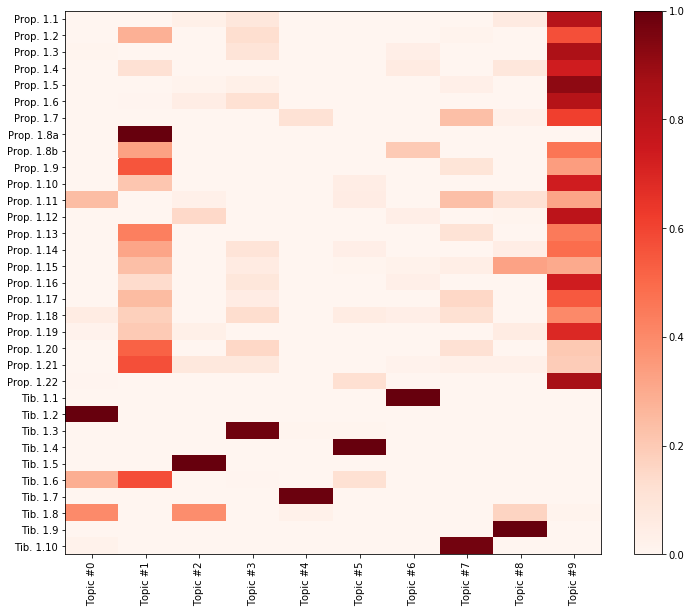

In [399]:
N, K = doctopic.shape  # N documents, K topics
topic_labels = ['Topic #{}'.format(k) for k in range(K)]

plt.figure(figsize=(12,10))
plt.pcolor(doctopic, norm=None, cmap='Reds')
plt.yticks(np.arange(doctopic.shape[0])+0.5, names);
plt.xticks(np.arange(doctopic.shape[1])+0.5, topic_labels);
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.colorbar(cmap='Reds')
plt.show()

In [383]:
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: que cum2 punc pauper nunc bellum deus gero meus uua
Topic 1: amor meus tuus noster puella nullus dolor durus nunc cogo
Topic 2: uolo puer que amor do dies aqua uenus fero doceo
Topic 3: cum2 que pono amor neu meus uenus seu nox totus
Topic 4: que amor tuus manus duco magnus procul sto meus multus
Topic 5: que nunc terra illic amor os de_ lio porto sacer
Topic 6: do que puer deus uenus cantus nox saepe serus nunc
Topic 7: que tuus multus cum2 meus puer deus aurum facio amor
Topic 8: que doceo primus cano durus do tener uenio candidus cantus
Topic 9: que meus fero pono teneo cum2 parco nunc tener iners
